## Final Project Submission

Please fill out:
* Student name: Viktoria Szontagh
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Joseph Mata
* Blog post URL:


In [ ]:
# Your code here - remember to use markdown cells for comments as well!

## Project Overview

### Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

Questions
- What genres makes the most in the box office?
- What genres makes the most in domestic and foreign market?
- Which languages, besides english, has the higher gross revenue?
- What is the average runtime for the highest grossing genres?
- What makes the movie popular? Is it the director, actor, acress?
- Optimal film length (top 10 movies avg length)?
- Are series bring in more money or is the revenue is constanst after the 1st?

### The Data

### Code

In [2]:
import pandas as pd
import numpy as np
import csv
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
info = pd.read_table('zippedData/rt.movie_info.tsv.gz')
reviews = pd.read_table('zippedData/rt.reviews.tsv.gz', encoding = 'unicode_escape')
movies = pd.read_csv('zippedData/tmdb.movies.csv.gz')
budget = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
im = sqlite3.Connection('zippedData/im.db')

In [4]:
#showing all the tables in the database
imdb_tables = """
SELECT name FROM sqlite_master WHERE type='table'
"""
pd.read_sql(imdb_tables, im)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [12]:
#checking the content of the movie_basics table
basics = ("""
SELECT *
FROM movie_basics;
""")
pd.read_sql(basics, im).head(5)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [14]:
#checking the content of the movie_ratings table
movie_ratings = ("""
SELECT *
FROM movie_ratings;
""")
pd.read_sql(movie_ratings, im).head(5)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [32]:
budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


### Joining tables

In [9]:
imdb = pd.read_sql("""
SELECT *
FROM movie_basics
JOIN movie_ratings
    USING (movie_id);
""", im)

imdb

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


In [10]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [15]:
imdb.isna().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

After joining the movie_basics and movie_ratings there are 73856 lines in the combined table.
The runtime_minutes and genres columns has missing information. 
After reviewing the columns with the missing values, I decided to drop the rows containing them,
as they have no added value for the data analysis.


In [16]:
imdb = imdb[imdb['genres'].notna()]

In [18]:
#check if the missing genre is droped
imdb.isna().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7332
genres                0
averagerating         0
numvotes              0
dtype: int64

In [24]:
#checking runtime null values
run_t = imdb[imdb['runtime_minutes'].isna()]
run_t.tail()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
73816,tt9887130,The Human Comedy,The Human Comedy,2019,NaN,Comedy,3.2,17
73828,tt9899290,Band Together with Logic,Band Together with Logic,2019,NaN,Documentary,8.7,10
73830,tt9899850,The Agitation,Ashoftegi,2019,NaN,"Drama,Thriller",4.9,14
73844,tt9905796,July Kaatril,July Kaatril,2019,NaN,Romance,9.0,5
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8


In [25]:
#removing lines with missing runtime_minutes
imdb = imdb[imdb['runtime_minutes'].notna()]


In [51]:
#imdb.head()
#reseting the index of the table
imdb =imdb.reset_index()
#removing unecessary columns
imdb = imdb.drop('index', axis = 1)
imdb = imdb.drop('level_0', axis = 1)
imdb

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Crime,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Biography,7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
4,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
...,...,...,...,...,...,...,...,...
65715,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365
65716,tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,6.2,5
65717,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
65718,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136


In [42]:
#checking the value count of the genre column
imdb['genres'].value_counts().head(10)


Drama                   10189
Documentary              9149
Comedy                   4604
Comedy,Drama             2451
Horror                   2232
Drama,Romance            1392
Thriller                 1288
Comedy,Drama,Romance     1159
Comedy,Romance           1128
Horror,Thriller           943
Name: genres, dtype: int64

In [ ]:
There are multiple lines where the column genres has multiple values for one movie. 
I decided to keep only the most typical one. For example: in the above example, if the genre has 'Comedy, Drama',
I will keep drama, over comedy, same with horror over thriller, drama over comedy and romance.


In [47]:
imdb['genres'][0]

'Crime'

In [52]:
#replace the multi-value genres, to one single genre

for i in range(len(imdb)):
    if 'Animation' in  imdb['genres'][i]:
        imdb['genres'][i] = 'Animation'
    elif 'Horror' in  imdb['genres'][i]:
        imdb['genres'][i] = 'Horror'
    elif 'Comedy' in  imdb['genres'][i]:
        imdb['genres'][i] = 'Comedy'
    elif 'Biography' in  imdb['genres'][i]:
        imdb['genres'][i] = 'Biography'
    elif 'Sport' in  imdb['genres'][i]:
        imdb['genres'][i] = 'Sport'
    if 'Crime' in  imdb['genres'][i]:
        imdb['genres'][i] = 'Crime'
    elif 'Documenary' in  imdb['genres'][i]:
        imdb['genres'][i] = 'Documentary'
    elif 'Sci-Fi' in  imdb['genres'][i]:
        imdb['genres'][i] = 'Sci-Fi'
    elif 'Adventure' in  imdb['genres'][i]:
        imdb['genres'][i] = 'Adventure'
    elif 'Fantasy' in  imdb['genres'][i]:
        imdb['genres'][i] = 'Fantasy'

/var/folders/0k/t_v9n_fd08b6ymg1f7lkdlb40000gn/T/ipykernel_31144/3372114706.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb['genres'][i] = 'Crime'
/var/folders/0k/t_v9n_fd08b6ymg1f7lkdlb40000gn/T/ipykernel_31144/3372114706.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb['genres'][i] = 'Biography'
/var/folders/0k/t_v9n_fd08b6ymg1f7lkdlb40000gn/T/ipykernel_31144/3372114706.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

In [53]:
imdb['genres'].unique()

array(['Crime', 'Biography', 'Drama', 'Comedy', 'Animation', 'History',
       'Documentary', 'Drama,Mystery', 'Action,Drama',
       'Documentary,History', 'Sci-Fi', 'Thriller', 'Horror',
       'Drama,Mystery,Thriller', 'Drama,Family', 'Adventure', 'Action',
       'Drama,History,War', 'Action,Thriller', 'Fantasy',
       'Action,Drama,Family', 'Drama,Romance', 'Drama,Romance,War',
       'Drama,Thriller', 'Mystery,Thriller', 'Sport',
       'Drama,Music,Romance', 'Drama,History,Romance',
       'Documentary,Music', 'Drama,Mystery,War', 'Documentary,Drama',
       'Drama,Music', 'Drama,War', 'Romance', 'Mystery', 'Musical',
       'Action,Drama,Thriller', 'Mystery,Romance',
       'Action,Mystery,Thriller', 'Family', 'Documentary,History,War',
       'Western', 'Music', 'Action,History', 'Documentary,War',
       'Drama,History', 'Drama,Romance,Thriller', 'Drama,Music,Musical',
       'Documentary,Drama,History', 'Drama,Musical',
       'Action,Drama,Western', 'Action,Drama,Romance',

In [58]:
for i in range(len(imdb)):
    if 'History' in  imdb['genres'][i]:
        imdb['genres'][i] = 'History'
    elif 'Action' in  imdb['genres'][i]:
        imdb['genres'][i] = 'Action'
    elif 'Drama' in imdb['genres'][i]:
        imdb['genres'][i] = 'Drama'
    elif 'Musical' in  imdb['genres'][i]:
        imdb['genres'][i] = 'Musical'
    elif 'Thriller' in  imdb['genres'][i]:
        imdb['genres'][i] = 'Thriller'
    elif 'Documentary' in  imdb['genres'][i]:
        imdb['genres'][i] = 'Documentary'
    elif 'History' in  imdb['genres'][i]:
        imdb['genres'][i] = 'History'

/var/folders/0k/t_v9n_fd08b6ymg1f7lkdlb40000gn/T/ipykernel_31144/1690897822.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb['genres'][i] = 'Drama'
/var/folders/0k/t_v9n_fd08b6ymg1f7lkdlb40000gn/T/ipykernel_31144/1690897822.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb['genres'][i] = 'History'
/var/folders/0k/t_v9n_fd08b6ymg1f7lkdlb40000gn/T/ipykernel_31144/1690897822.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

In [59]:
imdb['genres'].unique()

array(['Crime', 'Biography', 'Drama', 'Comedy', 'Animation', 'History',
       'Documentary', 'Action', 'Sci-Fi', 'Thriller', 'Horror',
       'Adventure', 'Fantasy', 'Sport', 'Romance', 'Mystery', 'Musical',
       'Mystery,Romance', 'Family', 'Western', 'Music', 'Music,Romance',
       'Family,Mystery', 'Family,Romance', 'War', 'News',
       'Family,Music,Romance', 'Game-Show', 'Family,Music', 'Reality-TV',
       'Family,Western', 'Romance,Western'], dtype=object)

After the 1st table is cleaned, I will merge the imdb table with the budget file.

In [36]:
imdb_all = imdb.merge(budget, left_on = 'original_title', right_on ='movie', suffixes = (False, '_bud'))

In [38]:
imdb_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2530 entries, 0 to 2529
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           2530 non-null   object 
 1   primary_title      2530 non-null   object 
 2   original_title     2530 non-null   object 
 3   start_year         2530 non-null   int64  
 4   runtime_minutes    2530 non-null   float64
 5   genres             2530 non-null   object 
 6   averagerating      2530 non-null   float64
 7   numvotes           2530 non-null   int64  
 8   id                 2530 non-null   int64  
 9   release_date       2530 non-null   object 
 10  movie              2530 non-null   object 
 11  production_budget  2530 non-null   object 
 12  domestic_gross     2530 non-null   object 
 13  worldwide_gross    2530 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 296.5+ KB


In [335]:
genres = (imdb_clean['genres'].str.split(pat = ',')).explode().unique() 
genres

array(['Action', 'Crime', 'Drama', 'Biography', 'Comedy', 'Fantasy',
       'Horror', 'Thriller', 'Adventure', 'Animation', 'History',
       'Documentary', 'Mystery', 'Sci-Fi', 'Family', 'Romance', 'War',
       'Music', 'Sport', 'Western', 'Musical', 'News', 'Reality-TV',
       'Game-Show', 'Adult'], dtype=object)

In [336]:
#creating an empty frequency table for genre
freq = {genre: 0 for genre in genres}
freq

#count frequency
for genre in imdb['genres']:
    #print(genre)
    if genre in freq.keys():
        freq[genre] +=1

# dict comprehension
#{genre: (freq[genre] = freq[genre] +1) for genre in imdb['genres'] if genre in freq.keys()}

freq

{'Action': 2063,
 'Crime': 586,
 'Drama': 35446,
 'Biography': 322,
 'Comedy': 14556,
 'Fantasy': 352,
 'Horror': 5757,
 'Thriller': 3656,
 'Adventure': 369,
 'Animation': 868,
 'History': 202,
 'Documentary': 21360,
 'Mystery': 347,
 'Sci-Fi': 521,
 'Family': 1291,
 'Romance': 1346,
 'War': 111,
 'Music': 245,
 'Sport': 110,
 'Western': 168,
 'Musical': 226,
 'News': 4,
 'Reality-TV': 5,
 'Game-Show': 1,
 'Adult': 0}

In [337]:
import operator
freq = dict(sorted(freq.items(), key = operator.itemgetter(1), reverse= True))
freq_keys = list(freq.keys())
freq_values = list(freq.values())
freq_keys[:10]
freq_values[:10]

[35446, 21360, 14556, 5757, 3656, 2063, 1346, 1291, 868, 586]

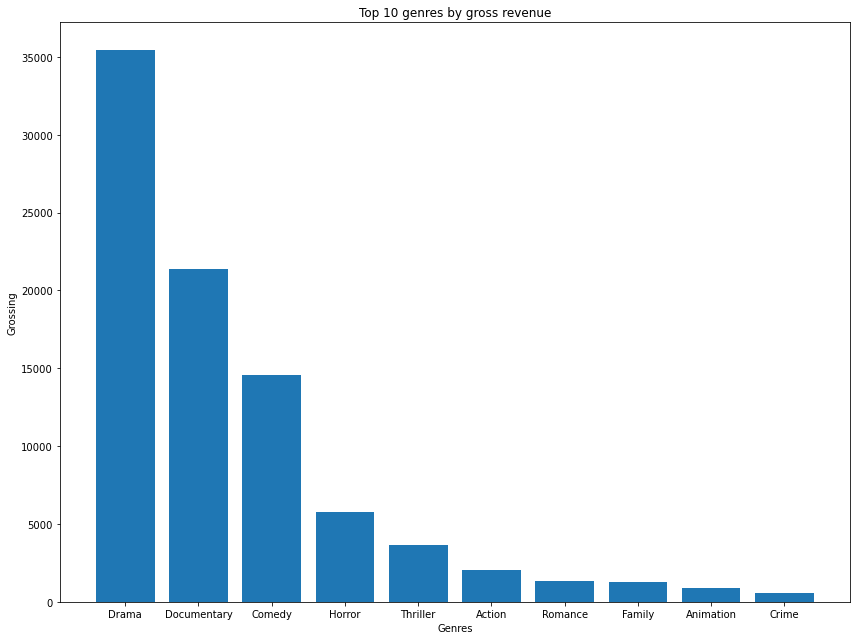

In [338]:
# bar diagram for number of films in genres
fig, ax = plt.subplots(figsize=(12,9))
ax.bar(freq_keys[:10], freq_values[:10])
fig.set_tight_layout(True)

ax.set_title("Top 10 genres by gross revenue")
ax.set_xlabel("Genres")
ax.set_ylabel("Grossing");

In [339]:
imdb_clean.isna().sum()

movie_id                  0
primary_title             0
original_title            0
start_year                0
runtime_minutes       10899
genres                    0
averagerating             0
numvotes                  0
ordering                  0
title                     0
region                43229
language             223691
types                107859
attributes           247737
is_original_title         0
dtype: int64

In [ ]:
#merging the budget file - old version

In [343]:
imdb_all = imdb.merge(budget, left_on='original_title', right_on ='movie', suffixes = (False, '_bud'))

In [ ]:
imdb_all = imdb_with_budget.drop_duplicates(subset = 'movie_id',keep='first', inplace = False)

In [ ]:
#replacing '$' and ',' in worldwide_gross, domestic_gross and production_budget columns
imdb_all['worldwide_gross'] = imdb_all['worldwide_gross'].apply(lambda x: x.replace('$',''))
imdb_all['worldwide_gross']= imdb_all['worldwide_gross'].apply(lambda x: x.replace(',',''))
imdb_all['worldwide_gross'] = imdb_all['worldwide_gross'].astype(int)
imdb_all['domestic_gross'] = imdb_all['domestic_gross'].apply(lambda x: x.replace('$',''))
imdb_all['domestic_gross'] = imdb_all['domestic_gross'].apply(lambda x: x.replace(',',''))
imdb_all['domestic_gross'] = imdb_all['domestic_gross'].astype(int)
imdb_all['production_budget'] = imdb_all['production_budget'].apply(lambda x: x.replace('$',''))
imdb_all['production_budget'] = imdb_all['production_budget'].apply(lambda x: x.replace(',',''))
imdb_all['production_budget'] = imdb_all['production_budget'].astype(int)

imdb_all['foreign_gross'] = imdb_all['worldwide_gross'] - imdb_all['domestic_gross']
imdb_all

In [344]:
# check for duplicates
imdb_with_budget.duplicated(keep='first')

0        False
1        False
2        False
3        False
4        False
         ...  
50487    False
50488    False
50489    False
50490    False
50491    False
Length: 50492, dtype: bool

In [345]:
imdb_all = imdb_with_budget.drop_duplicates(subset = 'movie_id',keep='first', inplace = False)

In [359]:
# top regions by number of movies
top_regions = imdb_all['region'].value_counts()
top_reg_nr = list(top_regions[:10])
top_reg_ind =list(top_regions.index)[:10]
top_reg_ind
#top_reg_index = top_regions.index
#top_reg_values = top_regions.value
#r = ['XWW', 'XSA', 'XEU','None']
#check = imdb[imdb_all['region'] == 'XEU']
#check

['US', 'en', 'RU', 'BR', 'CA', 'GR', 'DE', 'FR', 'BG', 'PL']

In [362]:
imdb_all['worldwide_gross'] = imdb_all['worldwide_gross'].apply(lambda x: x.replace('$',''))
imdb_all['worldwide_gross']= imdb_all['worldwide_gross'].apply(lambda x: x.replace(',',''))

In [366]:
imdb_all['worldwide_gross'] = imdb_all['worldwide_gross'].astype(int)

In [386]:
# top regions by grossing 
grouped_region = imdb_all.groupby('region')[['worldwide_gross']].mean()
#remove scientific notation 
#grouped_region.apply(lambda x: '%.5f' % x)#,axis=1)
top10regions = grouped_region.sort_values(by = 'worldwide_gross', ascending = False).head(10)

In [390]:
top10regions

,worldwide_gross
region,
LV,5.800867e+08
CZ,4.243947e+08
GE,3.864778e+08
XWW,3.428830e+08
CN,2.985120e+08
IR,2.693539e+08
UA,2.544861e+08
SK,2.459365e+08
EE,2.376354e+08


<AxesSubplot:xlabel='region', ylabel='worldwide_gross'>

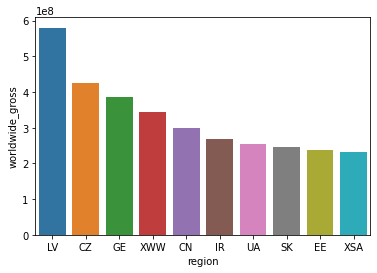

In [393]:
sns.barplot(x=top10regions.index, y = top10regions['worldwide_gross'])

In [61]:
#sns.barplot(data = grouped_region.sort_values(ascending = False).head(10),
 #           x = grouped_region.sort_values(ascending = False).head(10).index)

In [375]:
#avg runtime per region
avg_runtime_genre= imdb.groupby('genre')['runtime_minutes'].mean()
avg_runtime_genre.round(2)

region
AE    105.50
AL    109.50
AR    106.80
AU     94.23
AZ    107.50
       ...  
ko    100.00
pt    100.50
tl    103.00
tr     97.00
ur    155.00
Name: runtime_minutes, Length: 87, dtype: float64

### Next Steps

### Recommendations

To check gross revenue vs merchandise revenue.

### Thank You!